# WeatherPy
----

#### observations:
1. There is a strong correlation between Temperature and Latitude in cities from both Hemispheres, the pattern showcased by the different scatterplots, expose how cities closer to the equator better known as Tropical climate zone, are the hotests compared to the ones located far from it. 

2. in contrast with the Temperature Finding, there are no relationship between wind speed (mph), Cloudiness and Humidity and their location in Latitude for the sample cities analysed.

3. it is important to concider other variables may take place and influence the behavior of these natural phenomena for example: elevation, mountains and closeness to bodies of water among others

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:

#create empty list to store the info gathered through the forloop
new_city=[]
lat=[]
long=[]
Temperature=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
record = 1
sets = 1
print(f'''Beginning Data Retrieval
------------------------------------------------''')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        new_city.append(response["name"])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        Temperature.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])           
        print(f'Processing record {record} of set {sets}|{city}')
        record+=1
        
        if record%50 == 0:
            sets+=1
       
    except (KeyError):
        print("City not found. skipping.")

print(f'''------------------------------------------------       
Data Retrieval Complete
------------------------------------------------''')


Beginning Data Retrieval
------------------------------------------------
City not found. skipping.
Processing record 1 of set 1|huayucachi
Processing record 2 of set 1|barentin
Processing record 3 of set 1|bilibino
City not found. skipping.
Processing record 4 of set 1|lasa
Processing record 5 of set 1|mataura
Processing record 6 of set 1|vardo
Processing record 7 of set 1|yellowknife
Processing record 8 of set 1|jamestown
Processing record 9 of set 1|guymon
Processing record 10 of set 1|pouebo
Processing record 11 of set 1|punta arenas
Processing record 12 of set 1|saint-augustin
City not found. skipping.
Processing record 13 of set 1|batagay-alyta
Processing record 14 of set 1|moose factory
Processing record 15 of set 1|tura
Processing record 16 of set 1|nha trang
Processing record 17 of set 1|brae
Processing record 18 of set 1|hirara
Processing record 19 of set 1|rikitea
Processing record 20 of set 1|albany
Processing record 21 of set 1|vejen
Processing record 22 of set 1|yulara
Pr

Processing record 197 of set 4|la ciotat
City not found. skipping.
Processing record 198 of set 4|natal
Processing record 199 of set 4|punta cardon
Processing record 200 of set 5|matara
Processing record 201 of set 5|paoua
Processing record 202 of set 5|adrar
Processing record 203 of set 5|loralai
Processing record 204 of set 5|leningradskiy
Processing record 205 of set 5|marienburg
Processing record 206 of set 5|nome
Processing record 207 of set 5|narsaq
Processing record 208 of set 5|laguna
Processing record 209 of set 5|flin flon
Processing record 210 of set 5|grindavik
Processing record 211 of set 5|haapiti
Processing record 212 of set 5|kodiak
Processing record 213 of set 5|chahal
Processing record 214 of set 5|grootfontein
Processing record 215 of set 5|bambous virieux
Processing record 216 of set 5|vadso
Processing record 217 of set 5|shakawe
Processing record 218 of set 5|altay
Processing record 219 of set 5|havoysund
Processing record 220 of set 5|ojinaga
Processing record 221

Processing record 389 of set 8|kommunisticheskiy
Processing record 390 of set 8|togur
Processing record 391 of set 8|yingkou
Processing record 392 of set 8|svelgen
Processing record 393 of set 8|astana
Processing record 394 of set 8|salihorsk
Processing record 395 of set 8|sarangani
Processing record 396 of set 8|turukhansk
Processing record 397 of set 8|bose
Processing record 398 of set 8|isla mujeres
Processing record 399 of set 8|marang
City not found. skipping.
Processing record 400 of set 9|de-kastri
Processing record 401 of set 9|jeremie
Processing record 402 of set 9|beyneu
Processing record 403 of set 9|japura
Processing record 404 of set 9|praia
Processing record 405 of set 9|zhigansk
Processing record 406 of set 9|mondeville
Processing record 407 of set 9|hofn
Processing record 408 of set 9|svetlogorsk
Processing record 409 of set 9|yerofey pavlovich
Processing record 410 of set 9|puerto del rosario
Processing record 411 of set 9|syracuse
Processing record 412 of set 9|paidha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating city dataframe
city_df = pd.DataFrame({"City":new_city, 
                        "Cloudiness":Cloudiness, 
                        "Country":Country, 
                        "Date":Date, 
                        "Humidity":Humidity,
                        "Latitude":lat,
                        "Longitude":long,
                        "Temperature":Temperature,
                        "Wind Speed":Wind_Speed})
                                         
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("output_data/city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
City ID,,,,,,,,,
0,Huayucachi,84,PE,1659415498,80,-12.1333,-75.2333,10.28,0.70
1,Barentin,87,FR,1659415498,94,49.5453,0.9552,16.79,1.54
2,Bilibino,73,RU,1659415498,34,68.0546,166.4372,21.47,8.22
3,Laas,97,IT,1659415498,82,46.6166,10.7002,15.17,1.24
4,Mataura,10,NZ,1659415499,75,-46.1927,168.8643,6.93,5.11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidcities=city_df.loc[(city_df["Humidity"] > 100)]
if humidcities.empty == True:
    print('there are no cities where the humidity is > 100% in this data frame')

there are no cities where the humidity is > 100% in this data frame


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

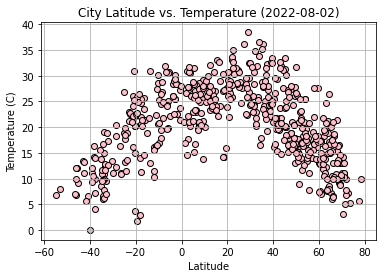

In [7]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o", color = "pink",edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({shortened_timestamp})")
plt.grid()
plt.savefig("output_data/latvsTemperature_plot.png")
plt.show()

City Latitude vs. Temperature scatter plot shows the relationship between Latitude and the average Temperature (C), in this figure we can observe how the cities that are close to the equator line tent to be hotter than the ones that are found farther from it weather South or North.

## Latitude vs. Humidity Plot

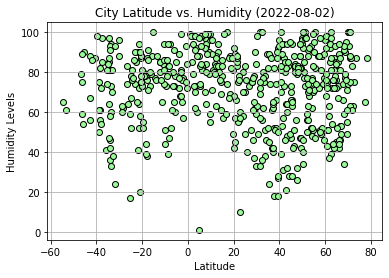

In [8]:
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o", color = "palegreen",edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Humidity Levels")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.grid()
plt.savefig("output_data/latvsHumidity_plot.png")
plt.show()

in this second scatter plot, we can see the relationship between Latitude and Humidity for August 8th 2022, there seems to be no correlation between the both variables.

## Latitude vs. Cloudiness Plot

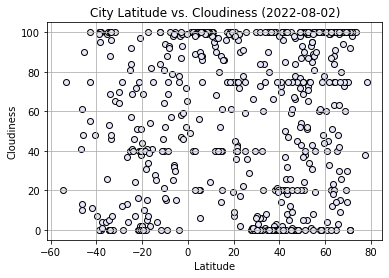

In [9]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o", color = "lavender",edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.grid()
plt.savefig("output_data/latvsCloudiness_plot.png")
plt.show()

this third scatter plot shows there is no relationship between the latitude and level of cloudness for the sample cities in this study 

## Latitude vs. Wind Speed Plot

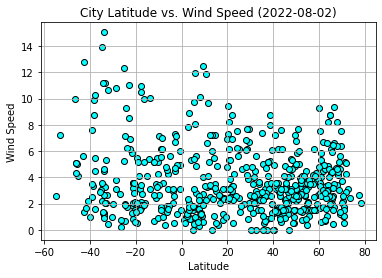

In [10]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o", color = "cyan",edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.grid()
plt.savefig("output_data/latvsWindSpeed_plot.png")
plt.show()

The above scatter plot showed the relationship between wind speed (mph), and latitude. there is not existent relationshio between the two variables.

## Linear Regression

In [11]:
Northern_hemisphere = city_df.loc[city_df["Latitude"]>=0]
Southern_hemisphere = city_df.loc[city_df["Latitude"]<0]

In [28]:
def linear_regressionplot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    plt.scatter(x,y, marker='o',
    facecolors='pink',
    edgecolors='hotpink',
    s=y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=12,color="black")
    plt.xlabel("Latitude")
    plt.grid()
    plt.savefig("output_data")
   
   

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

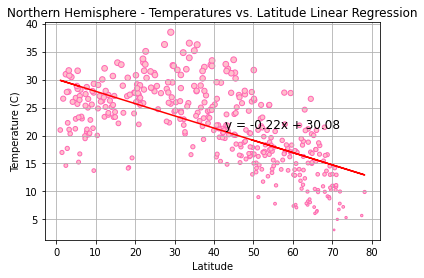

In [29]:
x = Northern_hemisphere["Latitude"]
y = Northern_hemisphere["Temperature"]
plt.ylabel("Temperature (C)")
plt.title('Northern Hemisphere - Temperatures vs. Latitude Linear Regression')
linear_regressionplot(x,y)

plt.savefig("output_data/NLatvsTemp_plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

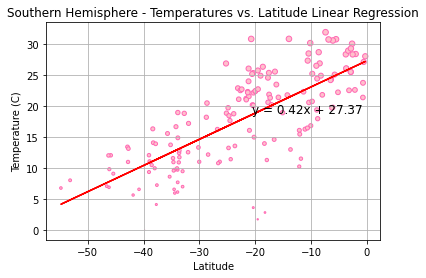

In [30]:
x = Southern_hemisphere["Latitude"]
y = Southern_hemisphere["Temperature"]

plt.ylabel("Temperature (C)")
plt.title('Southern Hemisphere - Temperatures vs. Latitude Linear Regression')
linear_regressionplot(x,y)

plt.savefig("output_data/SLatvsTemp_plot.png")

with these two scatter plot and linear regretions we can observe there is a strong correlation between the latitude point and the temperature of these sample of cities, in other words, the closer the city is located to the equartor line the hotter is going to be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

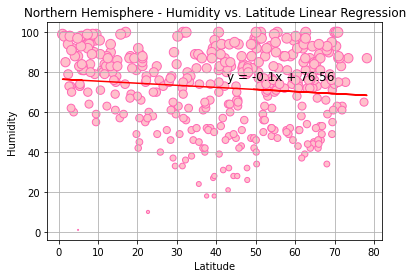

In [31]:
x = Northern_hemisphere["Latitude"]
y = Northern_hemisphere["Humidity"]


plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.ylabel('Humidity')
linear_regressionplot(x,y)

plt.savefig("output_data/NLatvsHumidity_plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

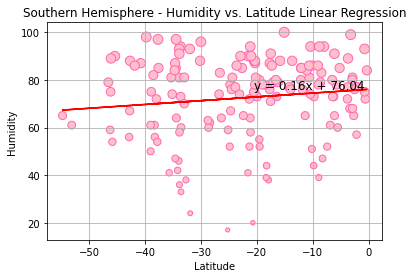

In [32]:
x = Southern_hemisphere["Latitude"]
y = Southern_hemisphere["Humidity"]

plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.ylabel('Humidity')

linear_regressionplot(x,y)
plt.savefig("output_data/SLatvsHumidity_plot.png")

after observing the Humidity vs. Latitude Linear Regression for both emispheres we can say that there is not correlation between those two variables

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

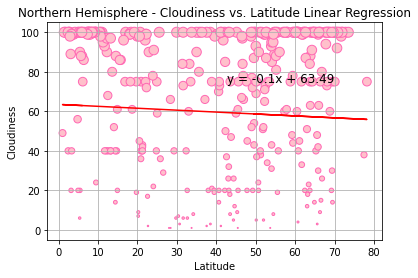

In [33]:
x = Northern_hemisphere["Latitude"]
y = Northern_hemisphere["Cloudiness"]

plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.ylabel('Cloudiness')

linear_regressionplot(x,y)
plt.savefig("output_data/NLatvsCloudiness_plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

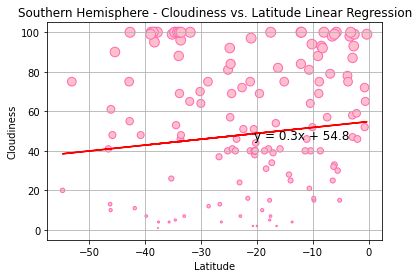

In [34]:
x = Southern_hemisphere["Latitude"]
y = Southern_hemisphere["Cloudiness"]

plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.ylabel('Cloudiness')

linear_regressionplot(x,y)
plt.savefig("output_data/SLatvsCloudiness_plot.png")

 in this third pair of scatter plots we can observe that the level of Cloudiness has no or very weak correlation with the Latitude in which the cities are located, both in the Southern and Northern hemispheres

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

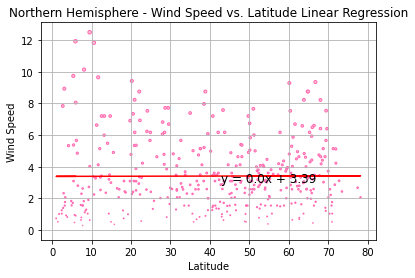

In [35]:
x = Northern_hemisphere["Latitude"]
y = Northern_hemisphere["Wind Speed"]

plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.ylabel('Wind Speed')

linear_regressionplot(x,y)
plt.savefig("output_data/NLatvsWindSpeed_plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

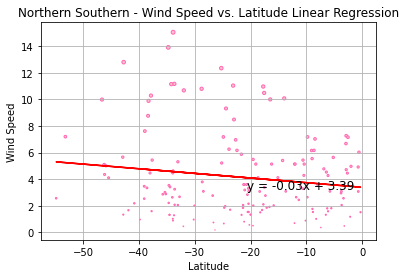

In [36]:
x = Southern_hemisphere["Latitude"]
y = Southern_hemisphere["Wind Speed"]

plt.title('Northern Southern - Wind Speed vs. Latitude Linear Regression')
plt.ylabel('Wind Speed')

linear_regressionplot(x,y)
plt.savefig("output_data/SLatvsWindSpeed_plot.png")

theres is non correlation between the Wind Speed and the Latitude of the cities in this study